In [155]:
import pandas as pd
df = pd.read_csv(r"C:\Users\dell\Downloads\archive (2)\sales_data_sample.csv", encoding="ISO-8859-1", engine="python")
print(df)


      ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0           10107               30      95.70                2  2871.00   
1           10121               34      81.35                5  2765.90   
2           10134               41      94.74                2  3884.34   
3           10145               45      83.26                6  3746.70   
4           10159               49     100.00               14  5205.27   
...           ...              ...        ...              ...      ...   
2818        10350               20     100.00               15  2244.40   
2819        10373               29     100.00                1  3978.51   
2820        10386               43     100.00                4  5417.57   
2821        10397               34      62.24                1  2116.16   
2822        10414               47      65.52                9  3079.44   

            ORDERDATE    STATUS  QTR_ID  MONTH_ID  YEAR_ID  ...  \
0      2/24/2003 0:00   Shipped 

In [157]:
# Convert ORDERDATE to datetime formatdf 
df["ORDERDATE"]= pd.to_datetime(df["ORDERDATE"], errors= "coerce")

# Check if conversion was successful
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ORDERNUMBER       2823 non-null   int64         
 1   QUANTITYORDERED   2823 non-null   int64         
 2   PRICEEACH         2823 non-null   float64       
 3   ORDERLINENUMBER   2823 non-null   int64         
 4   SALES             2823 non-null   float64       
 5   ORDERDATE         2823 non-null   datetime64[ns]
 6   STATUS            2823 non-null   object        
 7   QTR_ID            2823 non-null   int64         
 8   MONTH_ID          2823 non-null   int64         
 9   YEAR_ID           2823 non-null   int64         
 10  PRODUCTLINE       2823 non-null   object        
 11  MSRP              2823 non-null   int64         
 12  PRODUCTCODE       2823 non-null   object        
 13  CUSTOMERNAME      2823 non-null   object        
 14  PHONE             2823 n

In [159]:
print(df.isnull().sum())

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64


In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ORDERNUMBER       2823 non-null   int64         
 1   QUANTITYORDERED   2823 non-null   int64         
 2   PRICEEACH         2823 non-null   float64       
 3   ORDERLINENUMBER   2823 non-null   int64         
 4   SALES             2823 non-null   float64       
 5   ORDERDATE         2823 non-null   datetime64[ns]
 6   STATUS            2823 non-null   object        
 7   QTR_ID            2823 non-null   int64         
 8   MONTH_ID          2823 non-null   int64         
 9   YEAR_ID           2823 non-null   int64         
 10  PRODUCTLINE       2823 non-null   object        
 11  MSRP              2823 non-null   int64         
 12  PRODUCTCODE       2823 non-null   object        
 13  CUSTOMERNAME      2823 non-null   object        
 14  PHONE             2823 n

In [163]:
#Fill missing postal codes with '0'
df.fillna({"STATE": "unknown", "POSTALCODE": 0, "TERRITORY": "unknown"}, inplace=True) # Fill missing values for categorical columns with "Unknown"
# Drop ADDRESSLINE2 since it has too many missing values

# Remove Duplicates (if any)
df.drop_duplicates(inplace=True)
#  Verify Cleaning Process
df.info
print(df.isnull().sum())


ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE                  0
POSTALCODE             0
COUNTRY                0
TERRITORY              0
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64


In [169]:
# Finding Top 5 Customers by Revene
top_contri = df.groupby("CUSTOMERNAME")["SALES"].sum().sort_values(ascending=False).head(5)
print(top_contri)

CUSTOMERNAME
Euro Shopping Channel           912294.11
Mini Gifts Distributors Ltd.    654858.06
Australian Collectors, Co.      200995.41
Muscle Machine Inc              197736.94
La Rochelle Gifts               180124.90
Name: SALES, dtype: float64


In [171]:
Top_sold = df.groupby("PRODUCTLINE")["QUANTITYORDERED"].sum().sort_values(ascending=False).head(5)
print(Top_sold)

PRODUCTLINE
Classic Cars        33992
Vintage Cars        21069
Motorcycles         11663
Trucks and Buses    10777
Planes              10727
Name: QUANTITYORDERED, dtype: int64


In [236]:
trend = df.groupby("MONTH_ID")["SALES"].sum().sort_values(ascending = False).head(5)
print(trend)

MONTH_ID
11    2118885.67
10    1121215.22
5      923972.56
2      810441.90
1      785874.44
Name: SALES, dtype: float64


In [262]:
# Finding Sales Trends Over Time (Monthly Sales)

# Extract month and year from ORDERDATE
df["MONTH_ID"] = df["ORDERDATE"].dt.month
df["YEAR_ID"] = df["ORDERDATE"].dt.year
# Group sales by extracted YEAR_ID and MONTH_ID
monthly_sales = df.groupby(["YEAR_ID", "MONTH_ID"])["SALES"].sum().reset_index()


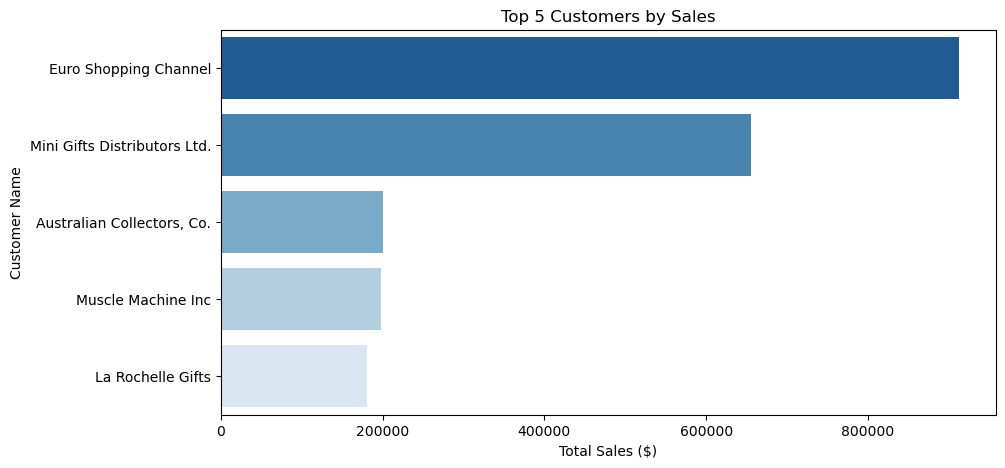

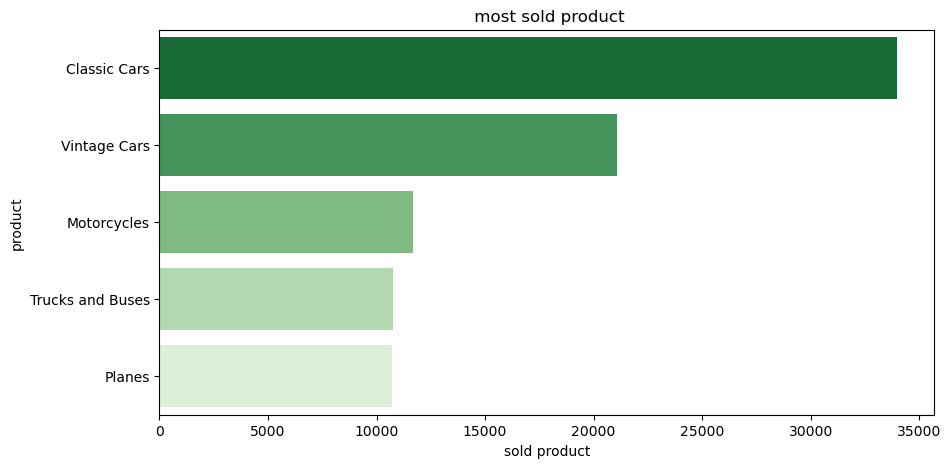

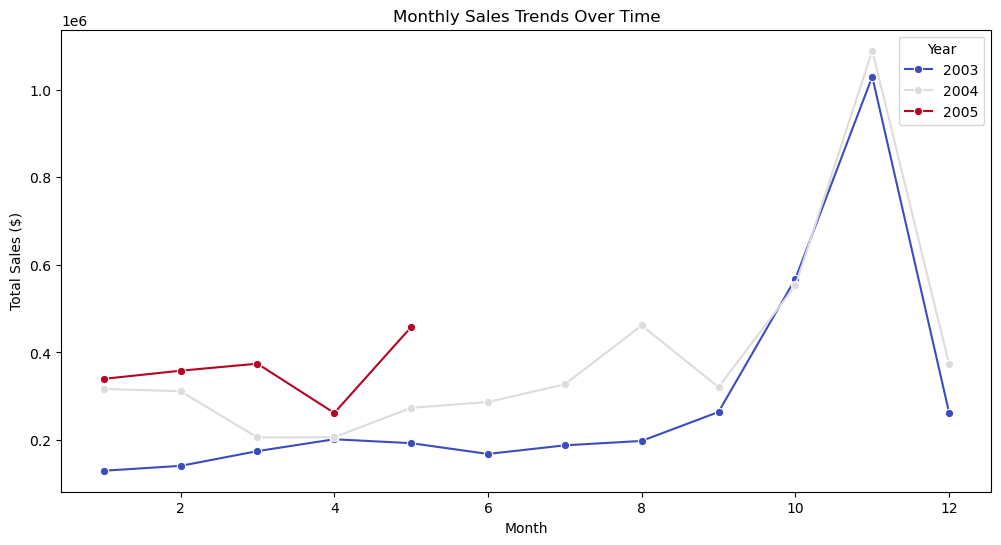

In [264]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Bar Chart for Top 5 Customers by Sales (Fix Warning)
plt.figure(figsize=(10,5))
sns.barplot(x=top_customers.values, y=top_customers.index, hue=top_customers.index, palette="Blues_r", legend=False)
plt.title("Top 5 Customers by Sales")
plt.xlabel("Total Sales ($)")
plt.ylabel("Customer Name")
plt.show()

plt.figure(figsize=(10,5))
sns.barplot(x=Top_sold.values,y=Top_sold.index,hue=top_customers.index,palette="Greens_r",legend= False)
plt.title(" most sold product")
plt.xlabel("sold product")
plt.ylabel("product")
plt.show()

# Step 3: Line Plot for Sales Trends Over Time
plt.figure(figsize=(12,6))
sns.lineplot(x=monthly_sales["MONTH_ID"], y=monthly_sales["SALES"], hue=monthly_sales["YEAR_ID"], marker="o", palette="coolwarm")
plt.title("Monthly Sales Trends Over Time")
plt.xlabel("Month")
plt.ylabel("Total Sales ($)")
plt.legend(title="Year")
plt.show()
